<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/additional_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

In [ ]:
dataset = pd.read_csv('Student_performance_data _.csv')

In [ ]:
dataset.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Predict final frade

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dataset_for_pred = dataset[['StudyTimeWeekly', 'Absences', 'GPA', 'GradeClass']]
X = dataset_for_pred.iloc[:, :-1].values
y = dataset_for_pred.iloc[:, -1].values

In [ ]:
dataset_for_pred.head()

,StudyTimeWeekly,Absences,GPA,GradeClass
0,19.833723,7,2.929196,2.0
1,15.408756,0,3.042915,1.0
2,4.210570,26,0.112602,4.0
3,10.028829,14,2.054218,3.0
4,4.672495,17,1.288061,4.0


In [ ]:
y

array([2., 1., 4., ..., 2., 1., 1.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7828810020876826

<Axes: >

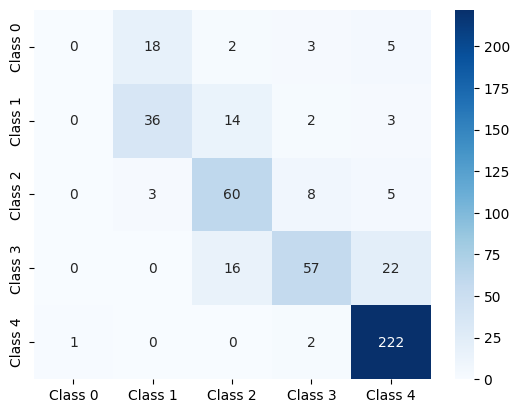

In [ ]:
labels = [f"Class {i}" for i in range(len(cm))]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, max_depth=10, min_samples_split=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=0)

In [ ]:
y_pred_random_forest = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_random_forest)
accuracy_score(y_test, y_pred_random_forest)

0.9144050104384134

<Axes: >

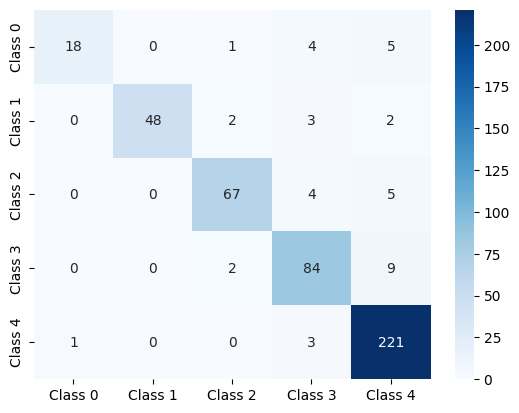

In [ ]:
labels = [f"Class {i}" for i in range(len(cm))]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
dataset_for_pred.corr('pearson')

,StudyTimeWeekly,Absences,GPA,GradeClass
StudyTimeWeekly,1.000000,0.009326,0.179275,-0.134131
Absences,0.009326,1.000000,-0.919314,0.728633
GPA,0.179275,-0.919314,1.000000,-0.782835
GradeClass,-0.134131,0.728633,-0.782835,1.000000


In [ ]:
correlation = np.corrcoef(dataset['StudyTimeWeekly'], dataset['GradeClass'])[0, 1]
print(f"Correlation between StudyTimeWeekly and GradeClass: {correlation:.4f}")

Correlation between StudyTimeWeekly and GradeClass: -0.1341


In [ ]:
# plt.figure(figsize=(10, 5))
# sns.scatterplot(x=dataset["StudyTimeWeekly"], y=dataset["GradeClass"], alpha=0.6)
# sns.regplot(x=dataset["StudyTimeWeekly"], y=dataset["GradeClass"], scatter=False, color="red")

## Клас 0 найкращий, чим більше часу витрачаєш, тим менший бал (кращий)

In [ ]:
correlation = np.corrcoef(dataset['ParentalEducation'], dataset['GradeClass'])[0, 1]
print(f"Correlation between ParentalEducation and GradeClass: {correlation:.4f}")

Correlation between ParentalEducation and GradeClass: 0.0410


In [ ]:
correlation = np.corrcoef(dataset['ParentalEducation'], dataset['GPA'])[0, 1]
print(f"Correlation between ParentalEducation and GPA: {correlation:.4f}")

Correlation between ParentalEducation and GPA: -0.0359


<ipython-input-23-0a68ac269136>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_gpa_means.index, y=edu_gpa_means.values, palette="viridis")


Text(0, 0.5, 'Final grade')

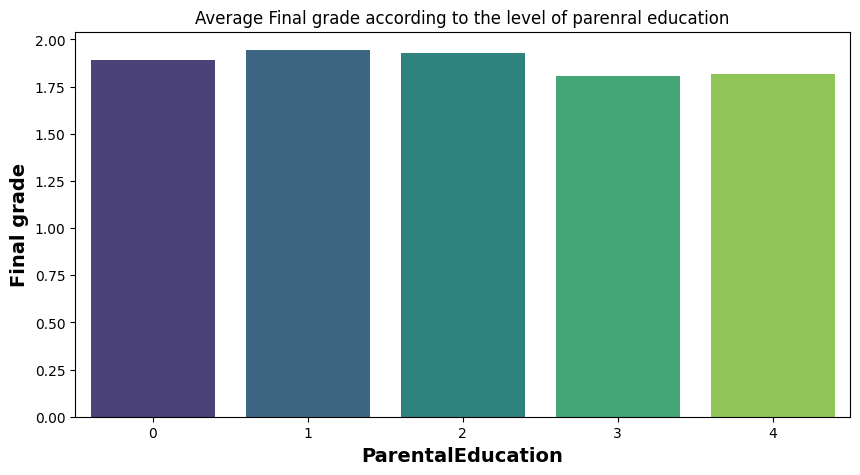

In [ ]:
edu_gpa_means = dataset.groupby("ParentalEducation")["GPA"].mean()
plt.figure(figsize=(10, 5))
plt.title("Average Final grade according to the level of parenral education")
sns.barplot(x=edu_gpa_means.index, y=edu_gpa_means.values, palette="viridis")
plt.xlabel("ParentalEducation", fontsize=14, fontweight="bold")
plt.ylabel("Final grade", fontsize=14, fontweight="bold")


<Axes: xlabel='StudyTimeWeekly', ylabel='GPA'>

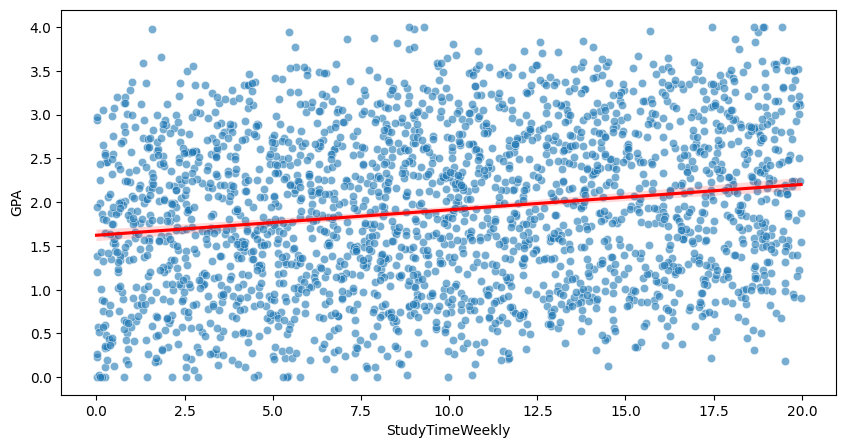

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=dataset["StudyTimeWeekly"], y=dataset["GPA"], alpha=0.6)
sns.regplot(x=dataset["StudyTimeWeekly"], y=dataset["GPA"], scatter=False, color="red")